<a href="https://colab.research.google.com/github/Anstronsx/Data-visualization/blob/main/Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

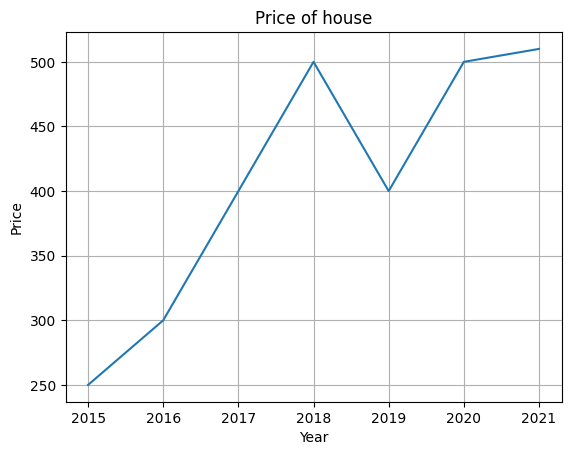

In [13]:
#Aqui se podria integrar csv de database of price of house rent

price = [250,300,400,500,400,500, 510]
year = [2015,2016,2017,2018,2019,2020,2021]
#Qué factores estan alterando el crecimeinto de todo?
#se lo puede integrar con cambios ambientales para encontrar correlación

plt.plot(year, price)
plt.title('Price of house')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [17]:
# Monta Google Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [18]:
# Muestra el contenido del directorio actual
!ls "/content/gdrive"

MyDrive


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
# Cambia el directorio de trabajo actual a donde se encuentren las muestras descargadas del módulo I
import os
os.chdir('/content/drive/MyDrive/Data/')

In [ ]:
#Para importar datos desde un sistema aparte
# Load the dataset from the CSV file
#data = pd.read_csv("/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv")

In [25]:
# Verifique el directorio actual en el que está trabajando
!pwd
!ls

/content/drive/MyDrive/Data
StudentPerformanceFactors.csv


In [26]:
serie = pd.read_csv('StudentPerformanceFactors.csv')

In [56]:
serie.head(3)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74


In [39]:
#Check
serie.shape

(6607, 20)

In [40]:
#info
serie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [42]:
#description
serie.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [44]:
# Get descriptive statistics for categorical columns
serie.describe(include='object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [45]:
# Calculate the range of 'Exam_Score' (max - min)
max_score = serie['Exam_Score'].max()
min_score = serie['Exam_Score'].min()
score_range = max_score - min_score
print(f"\nRange of Exam Scores: {score_range}")


Range of Exam Scores: 46


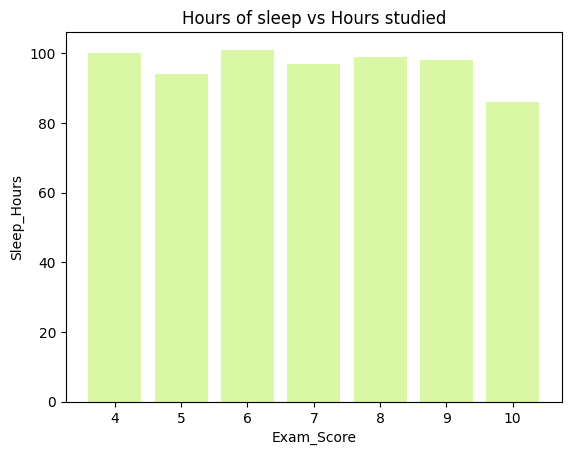

In [55]:
plt.bar(serie['Sleep_Hours'], serie['Exam_Score'], color = '#DAF7A6')
plt.title('Hours of sleep vs Hours studied')
plt.xlabel('Exam_Score')
plt.ylabel('Sleep_Hours')
plt.show()